In [1]:

import iris
import iris.analysis.stats as istats
import warnings
import matplotlib.pyplot as plt
import numpy as np
import iris.plot as iplt
import cartopy.crs as ccrs
import os
import cmocean
import iris
import pandas as pd
import datetime as dt

In [2]:
cx = iris.Constraint(longitude=lambda x: 110<=x<=155)
cy = iris.Constraint(latitude =lambda y:-45<=y<=-10)
ia39path = "/g/data/ia39/australian-climate-service/test-data/CORDEX-CMIP6/output/AUS-15/BOM/{model}/{scen}/{rev}/BOM-BARPA-R/v1/{time}/{var}/{var}_AUS-15_{model}_{scen}_r1i1p1f1_BOM-BARPA-R_v1_{time}_{year}01-{year}12.nc"

In [3]:
data=iris.load(ia39path.format(time='mon',var='pr',scen='evaluation',year='*',model='ECMWF-ERA5',rev='*'),cx&cy)

In [4]:
mask = iris.load("lsm.nc",cx&cy)

In [14]:
mask

[<iris 'Cube' of land_area_fraction / (1) (latitude: 227; longitude: 292)>,
<iris 'Cube' of land_binary_mask / (1) (latitude: 227; longitude: 292)>]

In [15]:
iris.util.equalise_attributes(data)
data=data.concatenate()

In [82]:
nino = np.array([ -0.15,0.07, 0.05,0.09,0.13,0.17,-0.09,0.04,-0.2,0.21,0.48,0.32,0.35,0.69,
0.55,0.33,0.09,0.2,0.13,0.37,0.02,-0.23,-0.12,-0.11,0.1,0.36,
-0.45,-0.45,-0.02,-0.17,-0.11,-0.15,-0.43,-0.18,-0.07,-0.03,-0.27,0.07,
-0.04,-0.13,-0.02,0.24,0.65,0.92,0.64,0.93,1.39,2,2.07,2.33,
2.43,2.22,1.69,1.12,1.12,0.62,-0.11,-0.13,-0.5,-1.03,-1.13,-0.95,
-0.8,-0.53,-0.48,-0.6,-0.64,-0.9,-0.4,-0.4,-0.35,-0.83,-1.18,-1.53,
-0.89,-0.91,-0.96,-0.98,-0.9,-0.76,-0.61,-0.49,-0.57,-0.64,-0.43,-0.4,
-0.79,-0.64,-0.51,-0.41,-0.47,-0.08,0.16,0.24,0.59,0.9,1.04,0.98,
1.19,1.17,1.24,0.89,0.91,1.24,1.34,1.48,1.53,1.36,1.29,1.05,
0.69,0.35,0.29,-0.49,-1.05,-1.46,-1.54,-1.44,-1.33,-2.09,-2.18,-1.98,
-1.95,-1.37,-1.33,-1.11,-0.8,-0.64,-0.47,-0.58,-0.38,-0.4,-0.3,-0.13,
0.02,0.36,0.2,0.26,0.32,0,0.15,0.17,0.12,0.13,0.08,0.32,
0.51,0.32,0.1,0.21,0.44,0.65,0.62,0.43,0.22,0.91,1.14,1.62,
1.61,1.62,1.5,1.41,1.27,0.53,0.27,-0.15,-0.14,-0.35,-0.14,0.04,
0.28,0.42,0.47,0.92,0.93,0.64,0.33,0.16,0.26,0.36,0.28,0.19,
0.03,-0.16,-0.06,0.03,0.14,0.27,0.16,0.52,0.4,0.9,1.14,1.21,
1.1,0.87,0.49,0.27,0.03,0.08,0.03,-0.38,-0.57,-0.72,-0.78,-0.72,
-0.65,-0.66,-0.48,-0.34,-0.4,-0.12,-0.14,-0.3,-0.34,-0.28,-0.3,-0.43,
-0.43,-0.24,-0.06,0.34,0.87,1.15,1.6,1.94,2.1,2.29,2.42,2.3,
2.42,2.08,1.49,0.9,0.68,-0.39,-0.73,-0.83,-0.82,-1.19,-1.23,-1.51,
-1.53,-1.41,-0.92,-0.81,-0.87,-0.95,-0.84,-0.98,-0.84,-1.03,-1.41,-1.54,
-1.79,-1.53,-1.26,-0.8,-0.8,-0.75,-0.57,-0.36,-0.39,-0.55,-0.75,-0.92,
-0.88,-0.63,-0.48,-0.3,-0.3,-0.11,0.01,-0.07,-0.28,-0.26,-0.28,-0.46,
-0.14,0,0.11,0.14,0.21,0.68,0.57,0.7,0.82,1.16,1.41,1.41,
0.98,0.64,0.48,-0.03,-0.52,-0.19,0.14,0.05,0.15,0.46,0.39,0.32,
0.26,0.17,-0.1,0.06,0.1,0.14,0.41,0.66,0.67,0.73,0.62,0.71,
0.56,0.26,0.28,0.28,0.3,0.22,-0.01,-0.04,-0.08,-0.15,-0.44,-0.75,
-0.98,-0.71,-0.73,-0.3,-0.11,0.09,0.03,0.37,0.63,0.76,0.98,1.1,
0.59,0.12,-0.15,-0.16,-0.39,-0.16,-0.37,-0.57,-1.04,-1.4,-1.58,-1.61,
-1.79,-1.7,-1.17,-0.89,-0.64,-0.44,-0.04,-0.04,-0.28,-0.3,-0.37,-0.9,
-1,-0.71,-0.72,-0.25,0.17,0.49,0.69,0.62,0.68,0.96,1.49,1.81,
1.43,1.18,1.07,0.56,-0.15,-0.62,-0.89,-1.33,-1.56,-1.65,-1.57,-1.63,
-1.7,-1.26,-0.98,-0.74,-0.53,-0.25,-0.23,-0.66,-0.76,-0.93,-1.09,-1.05,
-0.93,-0.61,-0.48,-0.29,-0.18,0.14,0.44,0.66,0.44,0.23,0.33,-0.13,
-0.42,-0.4,-0.14,-0.08,-0.28,-0.33,-0.28,-0.29,-0.09,-0.24,-0.02,-0.09,
-0.42,-0.45,-0.07,0.28,0.45,0.48,0.13,0.14,0.37,0.48,0.89,0.77,
0.59,0.57,0.48,0.9,1.04,1.28,1.56,1.87,2.01,2.21,2.57,2.56,
2.56,2.11,1.6,1.05,0.45,0.06,-0.25,-0.48,-0.46,-0.75,-0.63,-0.51,
-0.34,-0.01,-0.09,0.22,0.3,0.22,0.22,-0.18,-0.56,-0.52,-0.84,-0.85,
-0.86,-0.73,-0.73,-0.36,-0.12,0.12,0.27,0.05,0.3,0.84,1,0.97,
0.51,0.62,0.81,0.67,0.61,0.66,0.41,0.19,0.11,0.55,0.74,0.51,
0.64,0.48,0.36,0.49,-0.12,-0.21,-0.04,-0.42,-0.66,-1.19,-1.01,-0.98])
nino = np.convolve(nino,np.ones(5)/5,mode='valid')
time = [dt.datetime(1979+i//12,i%12+1,1) for i in range(len(nino))]
nino = pd.Series(nino,index=time)[:data[0].shape[0]]

In [79]:
nino[nino.index.to_series().apply(lambda x: x.month==1)]

1979-01-01    0.038
1980-01-01    0.402
1981-01-01   -0.092
1982-01-01   -0.078
1983-01-01    2.148
1984-01-01   -0.778
1985-01-01   -1.094
1986-01-01   -0.554
1987-01-01    1.124
1988-01-01    0.734
1989-01-01   -1.762
1990-01-01    0.030
1991-01-01    0.266
1992-01-01    1.498
1993-01-01    0.214
1994-01-01    0.056
1995-01-01    0.962
1996-01-01   -0.658
1997-01-01   -0.292
1998-01-01    2.142
1999-01-01   -1.320
2000-01-01   -1.506
2001-01-01   -0.732
2002-01-01   -0.154
2003-01-01    0.984
2004-01-01    0.208
2005-01-01    0.486
2006-01-01   -0.722
2007-01-01    0.528
dtype: float64

0
1
2
3


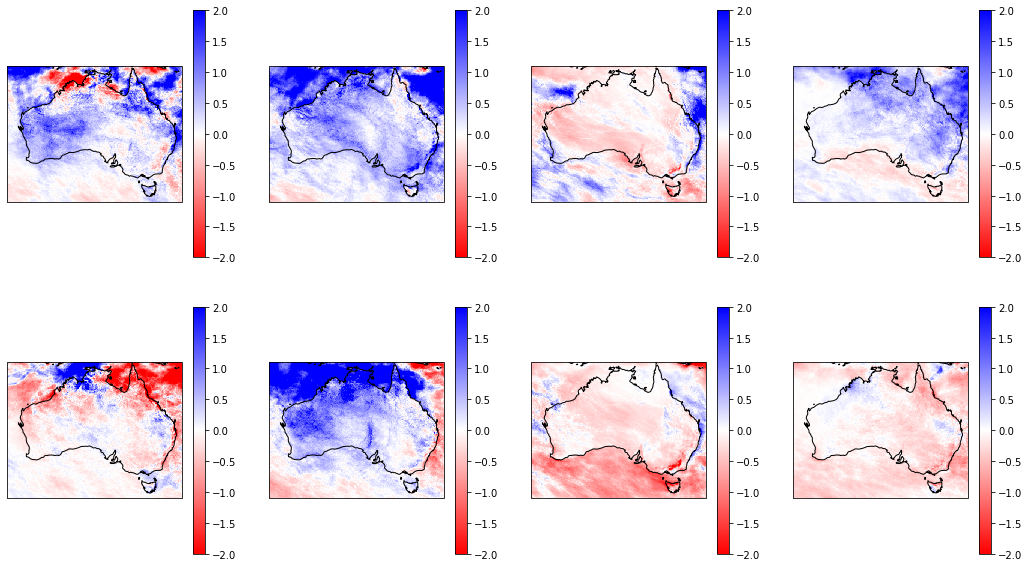

In [102]:
plt.figure(figsize=(18,10))
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    for i,months in enumerate([[12,1,2],[3,4,5],[6,7,8],[9,10,11]]):
        print(i)
        P =data[0].extract(iris.Constraint(time=lambda t: t.point.month in months))*86400
        N= nino[nino.index.to_series().apply(lambda x: x.month in months)]
        pos = P[N.values > 0.8].collapsed('time',iris.analysis.MEAN)
        neg = P[N.values <-0.8].collapsed('time',iris.analysis.MEAN)
        mean = P.collapsed('time',iris.analysis.MEAN)
        sig = P.collapsed('time',iris.analysis.STD_DEV)
        ax=plt.subplot(2,4,i+1,projection=ccrs.PlateCarree())
        iplt.pcolormesh((neg - mean),vmin=-2,vmax=2,cmap='bwr_r')
        plt.colorbar()
        ax.coastlines()
        ax=plt.subplot(2,4,i+5,projection=ccrs.PlateCarree())
        iplt.pcolormesh((pos - mean),vmin=-2,vmax=2,cmap='bwr_r')
        plt.colorbar()
        ax.coastlines()

In [92]:
agcd = iris.load(["/g/data/zv2/agcd/v2/precip/total/r005/01month/agcd_v2_precip_total_r005_monthly_%d.nc"%year for year in np.arange(1979,2008)])

In [96]:
iris.util.equalise_attributes(agcd)
agcd=agcd.concatenate_cube()

0
1
2
3


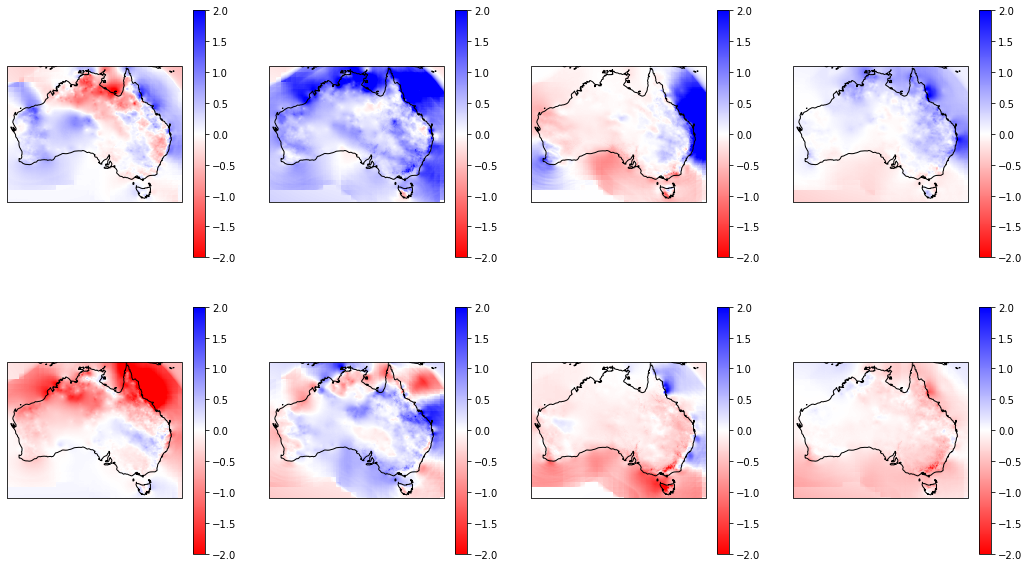

In [101]:
plt.figure(figsize=(18,10))
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    for i,months in enumerate([[12,1,2],[3,4,5],[6,7,8],[9,10,11]]):
        print(i)
        P =agcd.extract(iris.Constraint(time=lambda t: t.point.month in months))
        P.units='mm/month'
        P.convert_units('mm/day')
        N= nino[nino.index.to_series().apply(lambda x: x.month in months)]
        pos = P[N.values > 0.8].collapsed('time',iris.analysis.MEAN)
        neg = P[N.values <-0.8].collapsed('time',iris.analysis.MEAN)
        mean = P.collapsed('time',iris.analysis.MEAN)
        sig = P.collapsed('time',iris.analysis.STD_DEV)
        ax=plt.subplot(2,4,i+1,projection=ccrs.PlateCarree())
        iplt.pcolormesh((neg - mean),vmin=-2,vmax=2,cmap='bwr_r')
        plt.colorbar()
        ax.coastlines()
        ax=plt.subplot(2,4,i+5,projection=ccrs.PlateCarree())
        iplt.pcolormesh((pos - mean),vmin=-2,vmax=2,cmap='bwr_r')
        plt.colorbar()
        ax.coastlines()

In [77]:
len(nino)/12

41.833333333333336

In [104]:

agcd.units='mm/month'
agcd.convert_units('mm/day')
data=data[0]
data.units='mm/s'
data.convert_units('mm/day')

In [107]:
data.data.mask += mask[1][:,:-1].data

In [114]:
mask2 = mask[0].regrid(agcd,iris.analysis.AreaWeighted())
agcd.data.mask += mask2.data <1

In [112]:
mask[0].coord('longitude').coord_system=None
mask[0].coord('latitude').coord_system=None
agcd.coord('longitude').coord_system=None
agcd.coord('latitude').coord_system=None

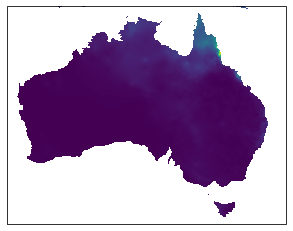

In [115]:
iplt.pcolormesh(agcd[0])

In [116]:
from iris.coord_categorisation import add_month

In [117]:
add_month(agcd,'time','month')

In [118]:
add_month(data,'time','month')

In [133]:
data2=agcd.copy()
data2.remove_coord('time')
agcd2=agcd.copy()
agcd2.remove_coord('time')

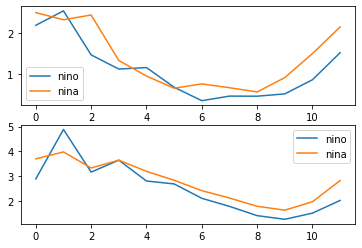

In [141]:
plt.subplot(211)
#x=agcd.aggregated_by('month',iris.analysis.MEAN).collapsed(['longitude','latitude'],iris.analysis.MEAN)
#plt.plot(x.data,label='all')
x,y = [],[]
for i in range(1,13):
    ct= iris.Constraint(time=lambda t: t.point.month ==i)
    x.append(agcd[nino.values>0.5].extract(ct).collapsed(['time','longitude','latitude'],iris.analysis.MEAN).data)
    y.append(agcd[nino.values<-0.5].extract(ct).collapsed(['time','longitude','latitude'],iris.analysis.MEAN).data)
    
plt.plot(x,label='nino')
plt.plot(y,label='nina')
plt.legend()

plt.subplot(212)
#x=data.aggregated_by('month',iris.analysis.MEAN).collapsed(['longitude','latitude'],iris.analysis.MEAN)
#plt.plot(x.data,label='all')
x,y = [],[]
for i in range(1,13):
    ct= iris.Constraint(time=lambda t: t.point.month ==i)
    x.append(data[nino.values>0.5].extract(ct).collapsed(['time','longitude','latitude'],iris.analysis.MEAN).data)
    y.append(data[nino.values<-0.5].extract(ct).collapsed(['time','longitude','latitude'],iris.analysis.MEAN).data)
    
plt.plot(x,label='nino')
plt.plot(y,label='nina')
plt.legend()


In [135]:
agcd[nino.values>0.5].aggregated_by('month',iris.analysis.MEAN).collapsed(['longitude','latitude'],iris.analysis.MEAN).coord('month')

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/iris/cube.py:3696: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))


<AuxCoord: month / (no_unit)  [Jun, Jul, ..., Apr, May]  shape(12,)>

In [136]:
x.coord('month')

<AuxCoord: month / (no_unit)  [Sep, Oct, ..., Jul, Aug]  shape(12,)>

In [8]:
import os
import iris
import xarray as xr

In [10]:
nrm = xr.load_dataset("NRM_clusters.nc")

In [13]:
nrm.ids.min()

<xarray.DataArray 'ids' ()>
array(0.)